# Primates Morphology

The `primates-morphology.csv` file contains **coordinates** derived from markers of skull features from various species of primates. 

**Goal**: Read the data and use unsupervised machine learning methods to separate the groups beloning to different species.

**Assessment**:
- Conduct critical research:
    - excellent use of research methodologies.
    - excellent use of design methodologies.
    - clear and validated design.
    - critical attitude towards own results, literature and specialists.
    - detailed interpretation and verification of the results.
    - conclusions are based on the resutls in a clear way.
    - conclusions are extrapolated to a wider context.
- Model mearningful information
    - results are extracted from correct analysis of data.
    - used algorithms are (cross) validated, evaluated and optimized. 
        - <span style="color:blue">TSNE hyperparam tuning</span>
    - outcome of research enhances knowledge of the topic.
- Deliver organized results:
    - code according to coding style
    - code is easy to read
        - - <span style="color:blue">config.yaml</span>
    - code is stored in a separate repository
    - repo contains a readme with complete instructions and version information.
    - repo contains license.
    
**Must haves**:
- A good working method and a non-working approach with explanation why it does or doesn't work.

-------------


# Imports

In [103]:
import itertools
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

from functions import plot_distribution
from functions import scree_plot
from functions import component_plot

# Loading file

In [3]:
df = pd.read_csv('data/primates-morphology.csv').drop(columns='Unnamed: 0')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,Abbreviation,Genus,Species,Sex,Age
0,133.426742,-101.627603,21.125902,-11.518251,4.621089,-1.519551,0.583410,-7.182875,1.410030,0.216411,...,-0.301822,-0.433051,0.037651,-0.279618,-0.421040,Ph,Presbytis,hosei,U,A
1,145.344740,-108.229812,21.121390,-14.982879,2.299335,-2.354040,0.431199,-5.266930,-1.424469,-1.451953,...,0.215340,-0.299550,0.709472,0.876382,-0.150133,Ph,Presbytis,hosei,F,A
2,137.773342,-107.162743,18.232497,-17.116294,3.016809,-5.295234,1.716895,-1.668914,-1.917478,0.601120,...,-0.481468,-0.243025,-0.537644,-0.140292,0.082158,Pr,Presbytis,rubicunda,U,A
3,141.523739,-107.436626,17.448083,-16.861469,3.382894,-1.071286,1.768891,-2.735232,-1.136700,-2.706925,...,0.586941,-0.043639,-0.518699,-1.051100,0.542354,Pr,Presbytis,rubicunda,M,A
4,142.357906,-97.195294,10.511391,-6.520641,3.555506,1.652390,-0.655919,-5.373075,-1.466841,-2.626544,...,0.653851,0.718319,0.798722,-0.396749,0.844772,Pr,Presbytis,rubicunda,F,A


In [4]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,Abbreviation,Genus,Species,Sex,Age
160,-91.085462,-46.160638,86.488654,16.969797,8.581993,-8.889106,3.806365,-2.572926,-1.852834,-0.197013,...,0.360452,0.513323,0.043604,0.294724,-0.003514,Hl,Hylobates,lar,F,A
161,-91.489354,-39.614165,87.430951,20.871706,11.444575,-6.707486,1.910320,-5.616304,-3.878495,-0.037360,...,-0.368755,-0.173323,-0.627292,0.092090,0.444992,Hl,Hylobates,lar,F,A
162,-90.204104,-40.985982,83.286250,19.714259,10.448984,-10.269775,4.749293,-2.725633,-1.577457,2.706787,...,-0.033229,0.434486,-0.158110,-0.416191,0.160474,Hl,Hylobates,lar,F,A
163,-90.248202,-50.111180,77.285086,19.578454,5.634918,-13.863556,1.840409,-0.507864,-1.227452,0.595468,...,0.125275,-0.018511,0.080169,-0.235063,0.317110,Hl,Hylobates,lar,F,A
164,-88.663448,-43.835382,74.681197,19.086880,9.755993,-9.499983,2.948722,-2.992005,-0.666312,0.333317,...,0.141954,-0.947492,0.060862,-0.297479,0.723835,Hl,Hylobates,lar,F,A


# Exploration

In [5]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', 'Abbreviation', 'Genus', 'Species', 'Sex',
       'Age'],
      dtype='object')

The goal is to separate the species using clustering. For this reason, only the coordinates and the `Species` columns are important. We do not need the rest.

In [6]:
X = df.iloc[:, :30]
y = df['Species']

Create a count plot to investigate the number of species

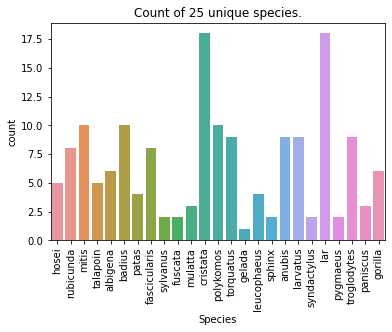

cristata        18
lar             18
polykomos       10
mitis           10
badius          10
troglodytes      9
larvatus         9
anubis           9
torquatus        9
fascicularis     8
rubicunda        8
gorilla          6
albigena         6
talapoin         5
hosei            5
leucophaeus      4
patas            4
mulatta          3
paniscus         3
fuscata          2
sphinx           2
sylvanus         2
syndactylus      2
pygmaeus         2
gelada           1
Name: Species, dtype: int64

In [7]:
sns.countplot(x=y, label='Count')
plt.title(f'Count of {len(y.unique())} unique species.')
plt.xticks(rotation=90)
plt.show()

y.value_counts()

There are 25 different species in total. The dataset is imbalanced which can influence the clustering results. It may be possible that a certain algorithm is not able to find a class. Also, tricks for oversampling are highly data dependent. This means that oversampling gelada will not work. This will be an obstacle in achieving optimal performance.

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       165 non-null    float64
 1   1       165 non-null    float64
 2   2       165 non-null    float64
 3   3       165 non-null    float64
 4   4       165 non-null    float64
 5   5       165 non-null    float64
 6   6       165 non-null    float64
 7   7       165 non-null    float64
 8   8       165 non-null    float64
 9   9       165 non-null    float64
 10  10      165 non-null    float64
 11  11      165 non-null    float64
 12  12      165 non-null    float64
 13  13      165 non-null    float64
 14  14      165 non-null    float64
 15  15      165 non-null    float64
 16  16      165 non-null    float64
 17  17      165 non-null    float64
 18  18      165 non-null    float64
 19  19      165 non-null    float64
 20  20      165 non-null    float64
 21  21      165 non-null    float64
 22  22

There are no missing coordinates.

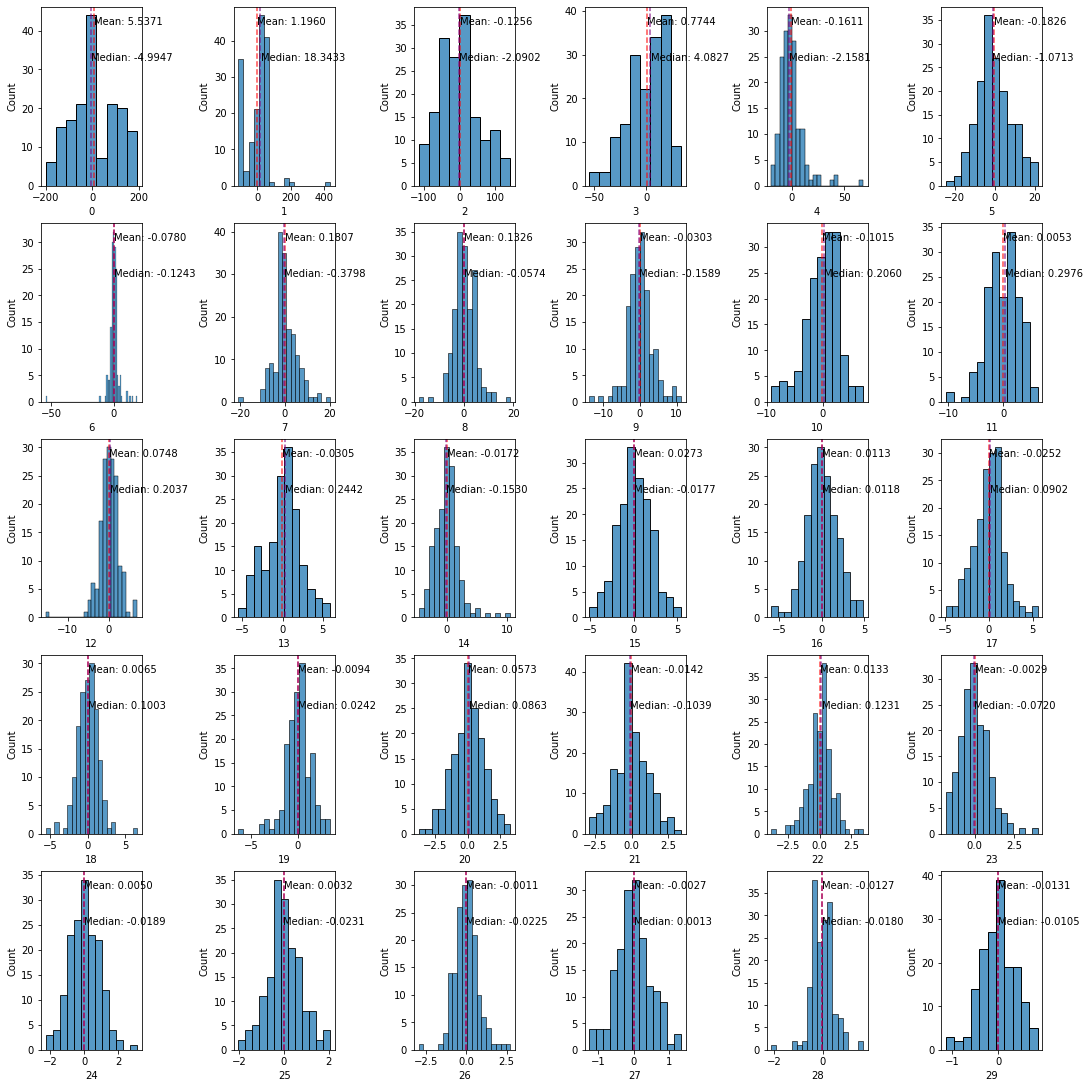

In [10]:
# inspecting the distribution
plot_distribution(X, 5, 6)

The distributions seem mostly Gaussian. However, there are some distributions that are more or less skewed, or show outliers. As the data is a coordinate space created by Procrustes Analysis, we can assume that the distributions are correct and that there are no mistakes in measurements. Thus, no further analysis is performed on this aspect.

<AxesSubplot:>

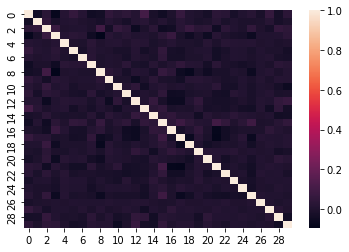

In [11]:
# inspecting correlation
sns.heatmap(X.corr())

As expected there are no correlations in the coordinate space.

# Representations
We can now try to visualize the morphology. There are `30` coordinates, so we can use `TSNE` to compress the visualization to a 2-D space. We can also try PCA to find clusters.

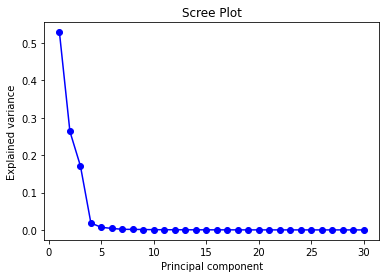

In [14]:
# no scaling is needed, as it is a coordinate space
pca = PCA()
pca.fit(X)
X_pca = pca.transform(X)

scree_plot(pca)

We see that the first 3 components explain most variance and that it levels off after component 3.

In [16]:
pca = PCA(n_components=3)
pca.fit(X)
pca.explained_variance_ratio_.sum()

0.9630431360473679

3 components explain around 96% of the variance.

In [17]:
X_pca = pca.transform(X)

In [78]:
markers = [',', '.', 'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X', ',', '.', 'o', 'v', '^', '<' , '>' ,'8']

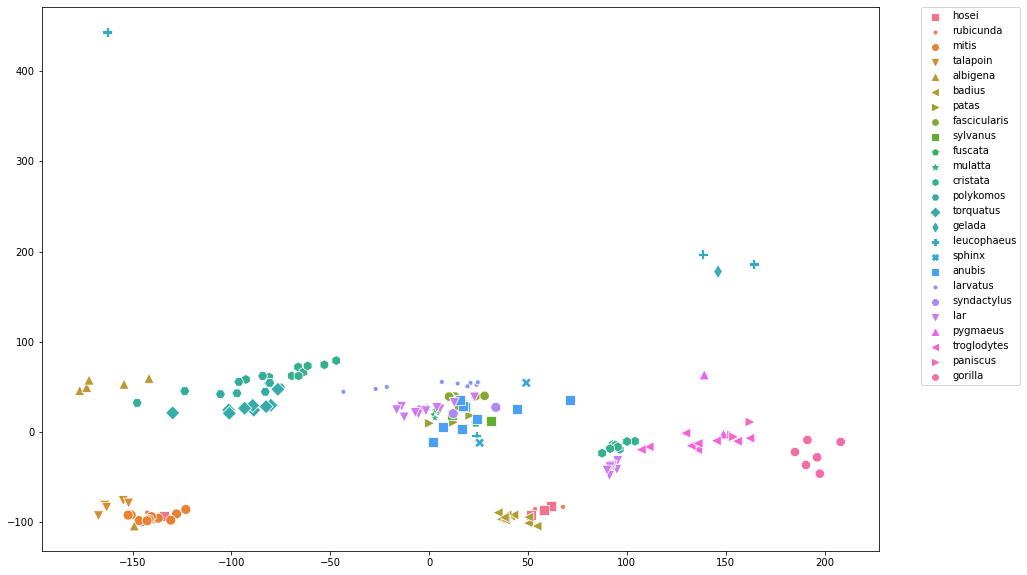

In [128]:
%matplotlib inline

plt.figure(figsize=(15, 10))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, style=y, legend='full',markers=markers, s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

<IPython.core.display.Javascript object>


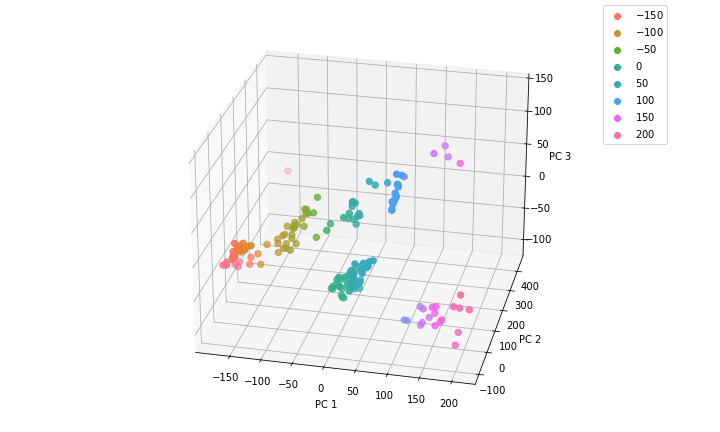

In [129]:
%matplotlib notebook

fig = plt.figure(figsize=(10,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

cmap = ListedColormap(sns.color_palette('husl', 25).as_hex())

sc = ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=X_pca[:,0], cmap=cmap, marker='o', s=40)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

We can clearly see separate clusters on this image. However, it is hard to distinguish between the different species based on color. For instance, a gorilla can easily be clustered, but the difference between anubis, patas, lar and syndactylus are not clear. The primates probably have the same size, and can not fully be differentiated by just the coordinate space.

**Visualize using TSNE**

I used hyperparameter optimization to create a TSNE model that minimizes the `kl_divergence` on the `X` data. The model can be found in the `output` folder or several models can be trained using the `optimize.sh` file. This file requires `parallel` and should be run on a linux system.

Normally you can use PCA components for TSNE, but as there are less than `50` features, I'm using the raw coordinates.

In [131]:
model = pickle.load(open('best_models/2d-753469-primates.pkl', 'rb'))
model.get_params()

{'angle': 0.8,
 'early_exaggeration': 12,
 'init': 'random',
 'learning_rate': 'auto',
 'method': 'barnes_hut',
 'metric': 'euclidean',
 'metric_params': None,
 'min_grad_norm': 1e-07,
 'n_components': 2,
 'n_iter': 2000,
 'n_iter_without_progress': 300,
 'n_jobs': None,
 'perplexity': 40,
 'random_state': None,
 'square_distances': 'deprecated',
 'verbose': 0}

In [126]:
model.kl_divergence_

0.06341607123613358

In [107]:
Y = model.fit_transform(X)

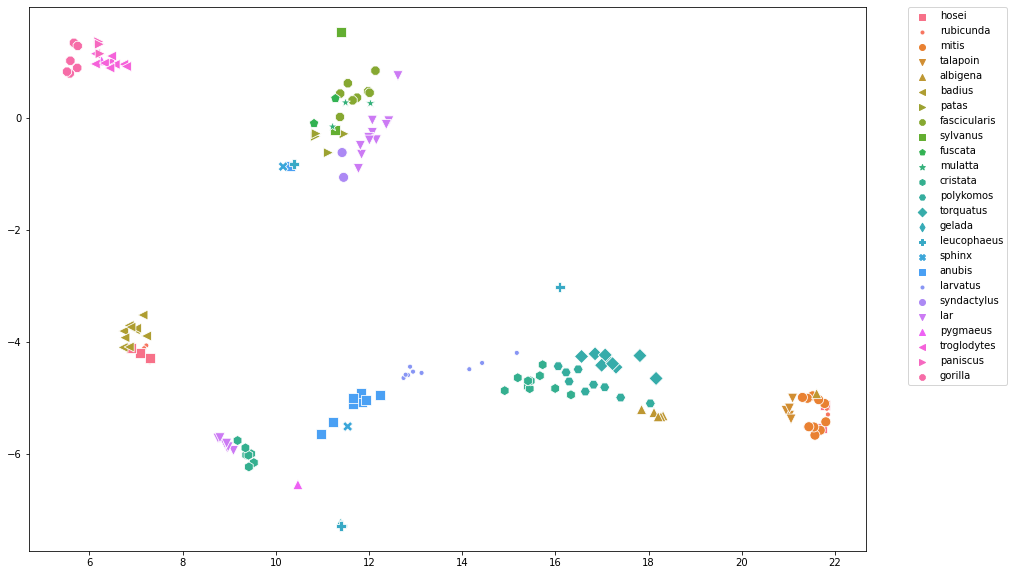

In [130]:
%matplotlib inline

plt.figure(figsize=(15, 10))
sns.scatterplot(x=Y[:, 0], y=Y[:, 1], hue=y, style=y, legend='full',markers=markers, s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [132]:
model = pickle.load(open('best_models/3d-821884-primates.pkl', 'rb'))
model.get_params()

{'angle': 0.8,
 'early_exaggeration': 12,
 'init': 'random',
 'learning_rate': 'auto',
 'method': 'barnes_hut',
 'metric': 'euclidean',
 'metric_params': None,
 'min_grad_norm': 1e-07,
 'n_components': 3,
 'n_iter': 4000,
 'n_iter_without_progress': 300,
 'n_jobs': None,
 'perplexity': 40,
 'random_state': None,
 'square_distances': 'deprecated',
 'verbose': 0}

In [133]:
model.kl_divergence_

0.039330143481492996

In [134]:
Y = model.fit_transform(X)

<IPython.core.display.Javascript object>


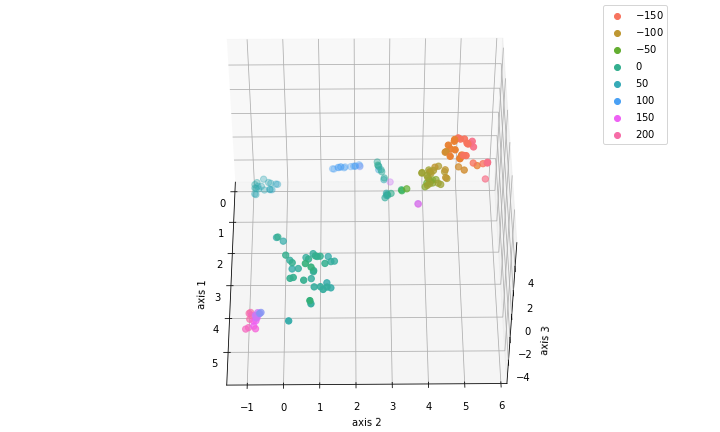

In [136]:
%matplotlib notebook

fig = plt.figure(figsize=(10,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

cmap = ListedColormap(sns.color_palette('husl', 25).as_hex())

sc = ax.scatter(Y[:,0], Y[:,1], Y[:,2], c=X_pca[:,0], cmap=cmap, marker='o', s=40)
ax.set_xlabel('axis 1')
ax.set_ylabel('axis 2')
ax.set_zlabel('axis 3')

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

We can see that there are clearly seperable clusters. From the observations we can state that the density differs among clusters and that the clusters have non-spherical shapes, although I wouldn't be suprised if Kmeans would perform quite well.

In [140]:
df['Genus'].value_counts()

Colobus           20
Hylobates         18
Trachypithecus    18
Macaca            15
Presbytis         13
Pan               12
Cercopithecus     10
Papio              9
Nasalis            9
Cercocebus         9
Gorilla            6
Mandrillus         6
Lophocebus         6
Miopithecus        5
Erythrocebus       4
Symphalangus       2
Pongo              2
Theropithecus      1
Name: Genus, dtype: int64